# Modelos 7
## 🏛️ Ensemble Learning
#### Nome: Aniel Ribeiro, Joaquim Junior e Matheus Velloso


### 1. Introdução


Neste notebook aprenderemos sobre o que é Ensemble Learning e treinaremos alguns modelos usando esse conceito.

### 2. Teoria
#### 2.1. Ensemble Learning
Os modelos de Machine Learning são muito diversos, cada um com pontos fortes e fracos. Fazendo uma analogia, podemos ter um modelo que é uma lança, boa para ataque a distância, mas péssimo para defesa, e um modelo que é um escudo, ótimo para defesa, mas péssimo para ataque. Assim, surgiu a consagrada combinação do uso de lança e escudo ao mesmo tempo, em que os pontos fracos de um são amenizados pelo outro para criar uma ótima combinação. Aplicando essa analogia para Machine Learning, o que aconteceria se combinássemos diversos modelos para criar um só resultado?
<div align="center">
    <img src="https://rukminim2.flixcart.com/image/480/640/j87njww0/poster/y/r/t/large-movie-300-spartan-warrior-spear-helm-shield-historical-original-imaesuuqepzzeuuy.jpeg?q=20" width="500">
</div>

O Ensemble Learning nasce justamente dessa ideia, combinando diversos modelos para criar um resultado único para o target.  Porém, também pode ser usado ao mudar os parâmetros de um mesmo modelo. O sklearn possui alguns métodos interessantes para essa ideia. Veremos alguns deles a seguir.

##### 2.2.1 Voting Classifier
O Voting Classifier é um módulo do sklearn que permite o uso de Ensemble Learning para modelos de classificação (atributo target é um rótulo). Ele pode ser de dois tipos, Hard ou Soft, que serão melhor detalhados mais a frente. Os parâmetros recebidos são:

estimators - recebe um array com tuplas de uma str para o nome e um modelo. Ex.: [('KNN', KNeighborsClassifier())]

voting - 'hard' ou 'soft'. default='hard'

weights - array com peso dado a cada modelo. default='None'

n_jobs - int com quantos modelos processar ao mesmo tempo. Usar -1 significa todos os processadores. default=1

flatten_transform - Para True (default), a função retorna uma matriz 2D de número de linhas o número de amostras e número de colunas o número de classes do target * número de modelos. Para cada linha e coluna são retornados as probabilidades obtidas da classe para o modelo para a amostra. Para False, é retornada uma matriz 3D com (n_modelos, n_amostras, n_classes), sendo mais fácil de visualizar.

verbose - printa o tempo gasto em cada modelo. default = False

##### 2.2.2 Voting Hard
O Voting Hard é o mais simples, basicamente calculando a moda dentre o resultado de todos os modelos. Por exemplo, se o primeiro classificou como cachorro, o segundo como gato e o terceiro como cachorro, retornará cachorro.
<div align="center">
    <img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*djKLooxyOLvr98oMi5uwgA.jpeg" width="500">
</div>


##### 2.2.3 Voting Soft
O Voting Soft, para cada modelo, pega a probabilidade de cada classificação de target e calcula a probabilidade da classificação na média dos modelos. Ex.: Probabilidades (cachorro, gato), modelo 1 (60%, 40%) modelo 2 (10%, 90%), modelo 3 (70%, 30%). O modelo soft calcula ((60+10+70)/3, (40+90+30)/3) = (46.7, 53.3) retornando então gato. Veja que para o mesmo caso o hard retornaria cachorro, enquanto o soft retorna gato, sendo um caso muito interessante.
<div align="center">
    <img src="https://miro.medium.com/v2/resize:fit:958/1*jWDS7vyoVmp3__sPALq64g.png" width="300">
</div>

A parte intrigante do Voting Soft é que os modelos do SKLearn não retornam explicitamente probabilidades, porém existe um método ".predict_proba()" que faz esse cálculo de probabilidade do modelo, então o voting classifier usa esse módulo automaticamente nos modelos passados a ele. Isso é também um dos problemas do soft, pois nem todos os modelos tem o módulo de probabilidade, dando raise error. Porém continuaria funcionando normalmente para voting hard.

Um exemplo do cálculo de ".predict_proba()" é no KNN. Para os n vizinhos mais próximos, a probabilidade de cada classe é o número de ocorrências de cada classe dividido por n. Exemplo, um sistema binário com 5 vizinhos mais próximos 1,0,1,1,0 terá probabilidade de 1 igual a 3/5 e probabilidade de 0 igual a 2/5.

##### 2.2.4 Hard x Soft
A diferença entre os dois é que o hard é mais simples e mais rápido, enquanto o soft é mais lento, porém pode alcançar acurácia maior. O voting classifier, por usar muitos modelos, é computacionalmente pesado, fazendo do voting hard uma boa alternativa para muitos casos, mesmo tendo acurácia muitas vezes menor.

#### 2.3 Stacking Classifier
O Stacking Classifier começa de forma análoga ao Voting Classifier, usa vários modelos para treinar e receber o resultado de cada um deles. Porém, após isso, o Stacking Classifier usa um novo modelo que é treinado com os outputs de cada modelo para selecionar o melhor resultado de target.
<div align="center">
    <img src="https://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier_files/stackingclassification_overview.png" width="500">
</div>

Os parâmetros do Stacking Classifier são:

estimators - recebe um array com tuplas de uma str para o nome e um modelo. Ex.: [('KNN', KNeighborsClassifier())]

final_estimator - seleciona o modelo que será usado para o treino a partir dos dados preditos. LogisticRegression é o default.

cv - cross-validation, para o treinamento final, dividindo os dados em selecionadas partes. default=5.


#### 2.4 Voting Regressor
O Voting Regressor funciona de forma semelhante ao Voting Classifier. Ele treina alguns modelos e calcula ao final a média ponderada dos resultados.
<div align="center">
    <img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*CyAktm2zC6ua2MSlCgGiIg.jpeg" width="600">
</div>

Os parâmetros recebidos são:

estimators - recebe um array com tuplas de uma str para o nome e um modelo. Ex.: [('KNN', KNeighborsClassifier())]

weights - um array com os pesos em int ou float de cada modelo na sequência. O default é a média atitmética.

n_jobs - int com quantos modelos processar ao mesmo tempo. Usar -1 significa todos os processadores. default=1

verbose - printa o tempo gasto em cada modelo. default = False

#### 2.5 Stacking Regressor
Também segue a mesma ideia que o Stacking Classifier, recebendo o output dos diversos modelos e com eles treinando um novo para o resultado final.
<div align="center">
    <img src="https://carpentries-incubator.github.io/machine-learning-novice-sklearn/fig/stacking.jpeg" width="600">
</div>

Ele recebe como parâmetros:

estimators - recebe um array com tuplas de uma str para o nome e um modelo. Ex.: [('KNN', KNeighborsClassifier())]

final_estimator - seleciona o modelo que será usado para o treino a partir dos dados preditos. RidgeCV é o default.

cv - cross-validation, para o treinamento final, dividindo os dados em selecionadas partes. default=5.

### 3. Uso do Voting Classifier

#### 3.1 Importação e tratamento do Data Frame

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [69]:
resultado_modelos = []
resultado_scores = []
df = pd.read_csv("diamonds.csv")
df = df.drop(["color", "clarity"], axis=1)
df = df.iloc[0:1000, 0:]
df = df.dropna()
df

,carat,cut,depth,table,x,y,z,price
0,0.23,Ideal,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...
995,0.54,Ideal,61.4,52.0,5.30,5.34,3.26,2897
996,0.72,Ideal,62.5,55.0,5.69,5.74,3.57,2897
997,0.72,Good,59.4,61.0,5.82,5.89,3.48,2897
998,0.74,Premium,61.8,58.0,5.81,5.77,3.58,2897


In [70]:
X = df.drop("cut", axis=1)
y = df["cut"]
SEMENTE = 27
#Divisão treino teste
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=SEMENTE)

#### 3.2 Voting Classifier
Usarei decision tree, random forest, gradient boost classifier, knn, SVC e GaussianNB.

In [162]:
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

kn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=27)
svc = SVC(probability= True, random_state=27)
dt = DecisionTreeClassifier(random_state=27)
gb = GradientBoostingClassifier(random_state=27)
gnb = GaussianNB()

modelos = []
models=[('kn', kn), ('rf', rf), ('svc', svc), ("dt", dt), ("gb", gb), ("gnb", gnb)]

#Fazer todas as combinações de modelos possíveis
list(itertools.combinations(models, 1))
for i in range(1, len(models) + 1):
    comb = list(itertools.combinations(models, i))
    for item in comb:
        modelos.append(list(item))  # Sempre converter para lista


Voting Classifier de todas as combinações:

In [163]:
modelos_us, modelos_sc = [], []
for k in modelos:
    voting_clf_hard = VotingClassifier(
        estimators=k, 
        voting='hard'
    )
    voting_clf_hard.fit(train_x, train_y)
    y_pred = voting_clf_hard.predict(test_x)
    accuracy_hard = accuracy_score(test_y, y_pred)
    modelos_sc.append(accuracy_hard)
    strings = [name for name, _ in k]
    modelos_us.append(' e '.join(strings))

Plotar gráfico de barras horizontal ordenado

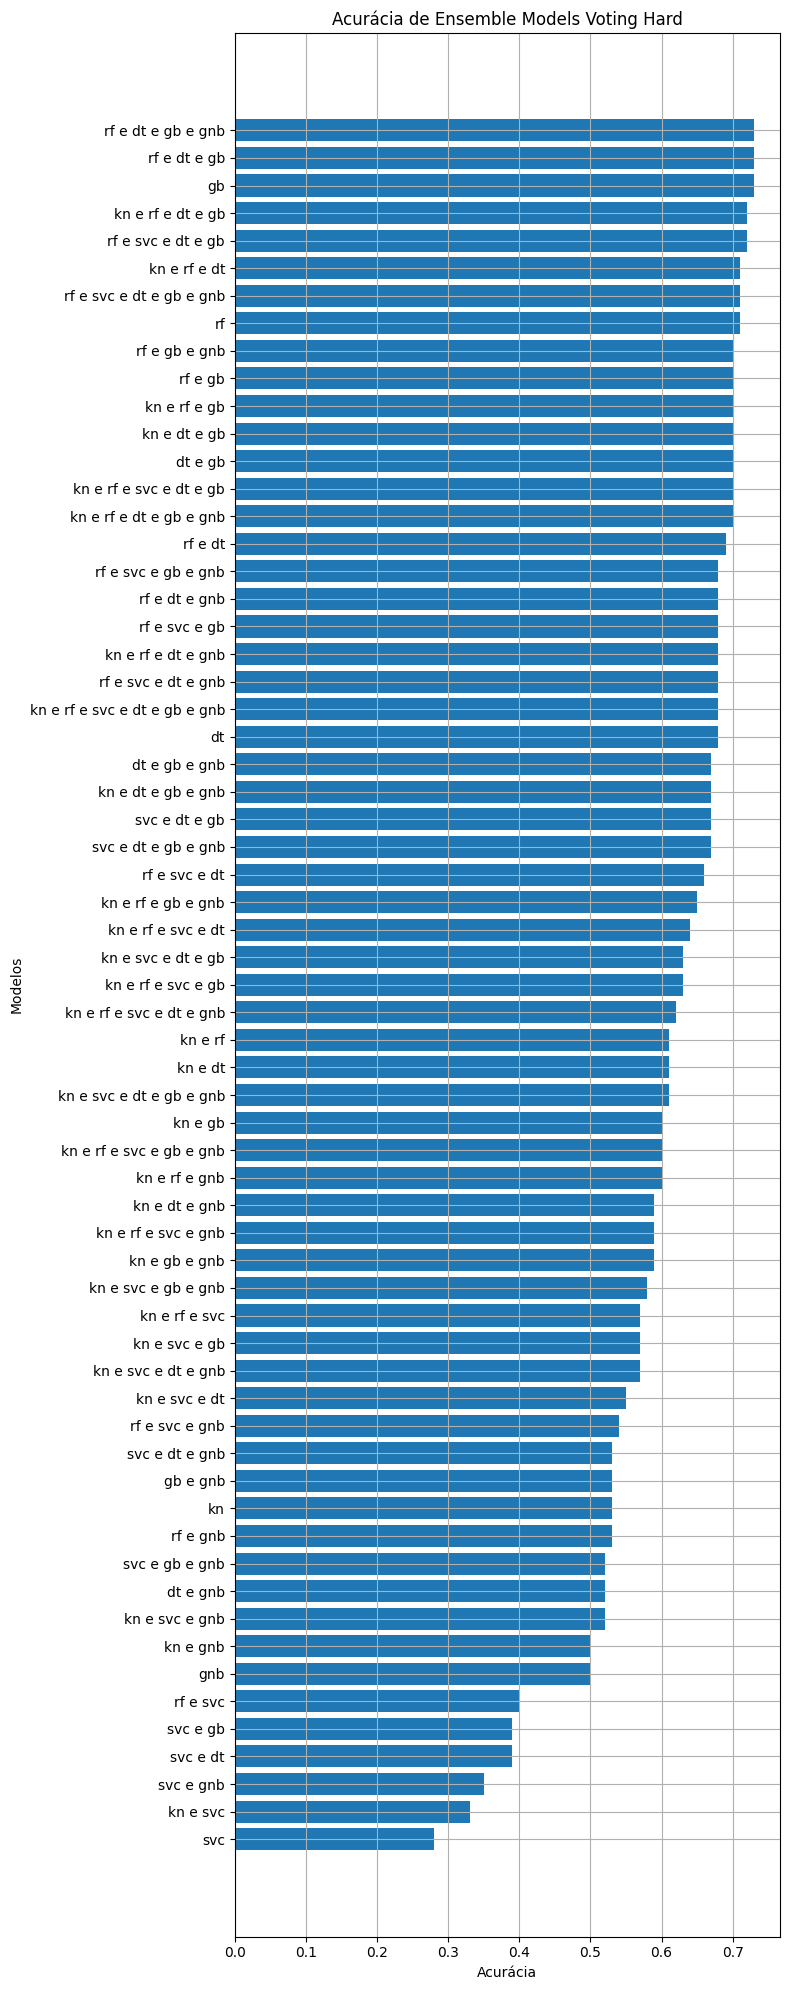

In [164]:
import numpy as np
import matplotlib.pyplot as plt

#Ordenar por acurácia
modelos_us = np.array(modelos_us)
modelos_sc = np.array(modelos_sc)
indices_ordenados = np.argsort(modelos_sc)
modelos_us_ord = modelos_us[indices_ordenados]
modelos_sc_ord = modelos_sc[indices_ordenados]

#Plotar
plt.figure(figsize=(8, 20))
plt.barh(modelos_us_ord, modelos_sc_ord)
plt.xlabel('Acurácia')
plt.ylabel('Modelos')
plt.title('Acurácia de Ensemble Models Voting Hard')
plt.tight_layout()
plt.grid(True)
plt.show()

Voting Classifier Soft:

In [165]:
modelos_us_s, modelos_sc_s = [], []
for k in modelos:
    voting_clf_soft = VotingClassifier(
        estimators=k, 
        voting='soft'
    )
    voting_clf_soft.fit(train_x, train_y)
    y_pred = voting_clf_soft.predict(test_x)
    accuracy_soft = accuracy_score(test_y, y_pred)
    modelos_sc_s.append(accuracy_soft)
    strings = [name for name, _ in k]
    modelos_us_s.append(' e '.join(strings))

Plotagem de Voting Soft ordenado:

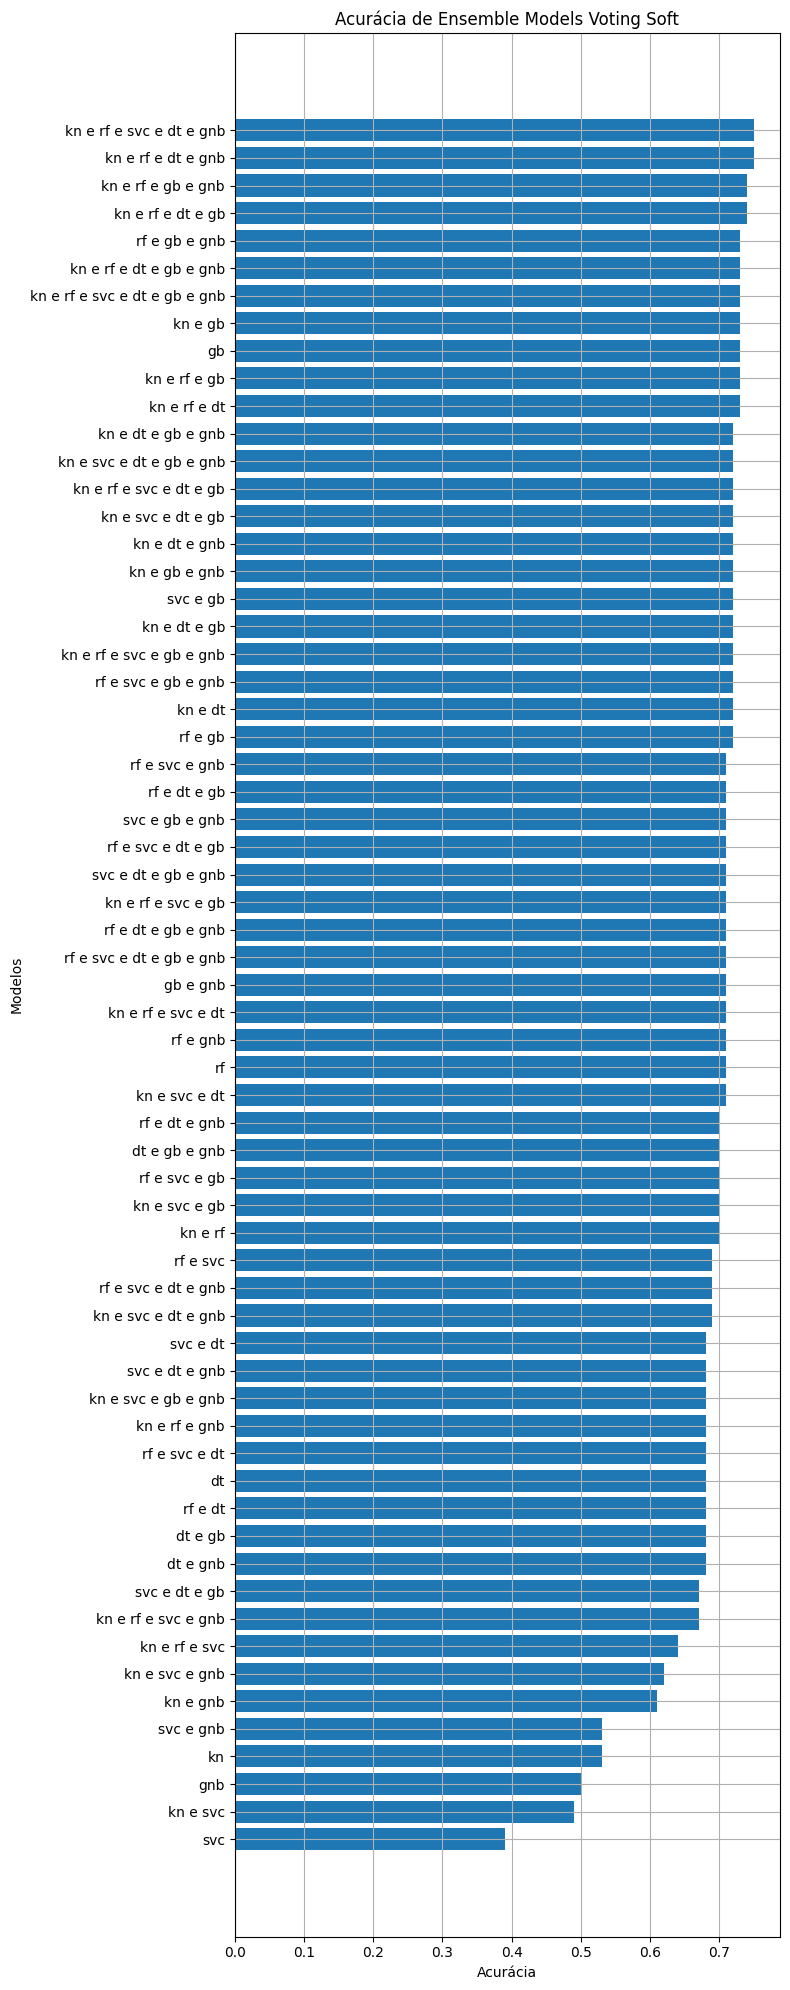

In [166]:
#Ordenar por acurácia
modelos_us_s = np.array(modelos_us_s)
modelos_sc_s = np.array(modelos_sc_s)
indices_ordenados_s = np.argsort(modelos_sc_s)
modelos_us_ord_s = modelos_us_s[indices_ordenados_s]
modelos_sc_ord_s = modelos_sc_s[indices_ordenados_s]

#Plotar
plt.figure(figsize=(8, 20))
plt.barh(modelos_us_ord_s, modelos_sc_ord_s)
plt.xlabel('Acurácia')
plt.ylabel('Modelos')
plt.title('Acurácia de Ensemble Models Voting Soft')
plt.tight_layout()
plt.grid(True)
plt.show()

Plotagem da junção ordenada de ambos

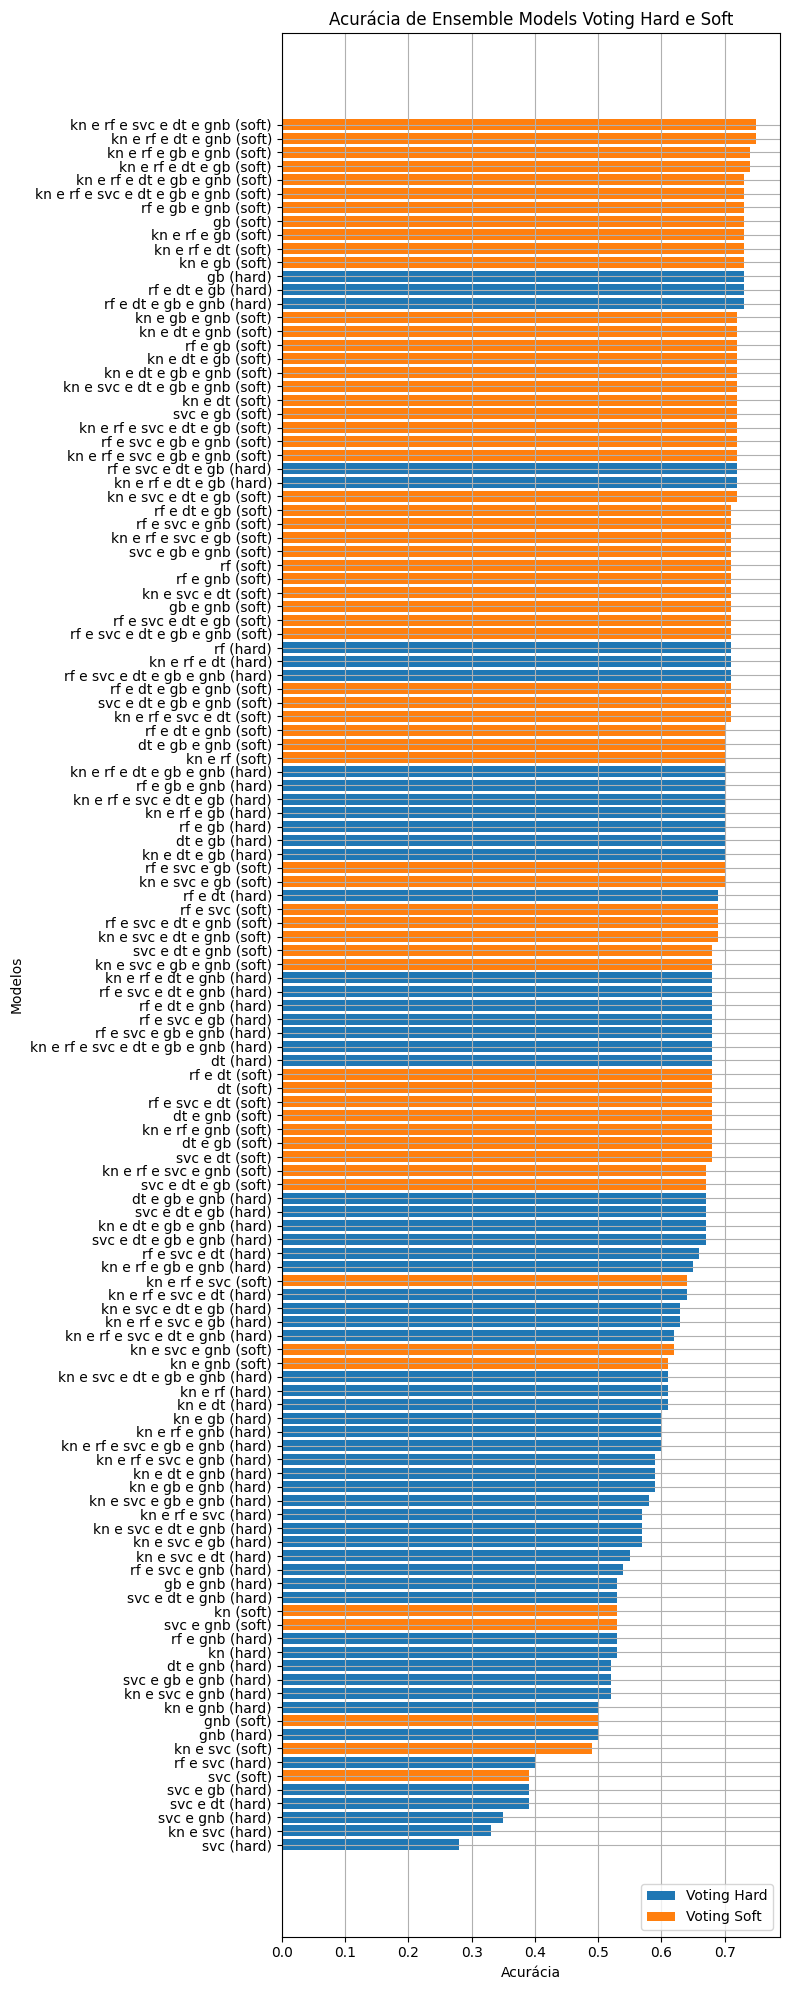

In [175]:
# Juntar os arrays e adicionar sufixos
modelos_us_n = [str(nome) + ' (hard)' for nome in modelos_us]
modelos_us_s_n = [str(nome) + ' (soft)' for nome in modelos_us_s]
modelos_us_td = modelos_us_n + modelos_us_s_n
modelos_sc_td = list(modelos_sc) + list(modelos_sc_s)

# Garantir que acurácias são float
modelos_sc_td = np.array(modelos_sc_td, dtype=float)
modelos_us_td = np.array(modelos_us_td) 

# Ordenar
indices_ordenados_td = np.argsort(modelos_sc_td)
modelos_us_ord_td = modelos_us_td[indices_ordenados_td]
modelos_sc_ord_td = modelos_sc_td[indices_ordenados_td]

#Plotar
plt.figure(figsize=(8, 20))
plt.barh(modelos_us_ord_td, modelos_sc_ord_td)
plt.xlabel('Acurácia')
plt.ylabel('Modelos')
plt.title('Acurácia de Ensemble Models Voting Hard e Soft')
plt.tight_layout()
plt.grid(True)
colors = ['tab:blue' if '(hard)' in n else 'tab:orange' for n in modelos_us_ord_td]
plt.barh(modelos_us_ord_td, modelos_sc_ord_td, color=colors)

# Adicionar legenda
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='tab:blue', label='Voting Hard'),
    Patch(facecolor='tab:orange', label='Voting Soft')
]
plt.legend(handles=legend_elements, loc='lower right')

plt.show()

Esse gráfico permite uma discussão sobre uma grande quantidade de fatores. Primeiramente, observamos que de fato, os voting soft obtiveram uma acurácia significativamente melhor em comparação com o hard, tendo o top 10 formado inteiramente por soft. Além disso, é interessante perceber que o melhor modelo individual foi o gradient boost. Porém, os dois modelos de maior acurácia não o usam. Por outro lado, o modelo de menor acurácia individual foi o svc e o modelo de melhor acurácia o usa. Porém é perceptível que nesse modelo, incluir ou não o svc não muda a acurácia do modelo soft, o que significa que as probabilidades do svc da classificação certa e a que ele dá são praticamente identicas. Por fim, algo que ainda não fui capaz de entender foi como svc hard e soft diferiram em acuracia drasticamente, mesmo com a seed dada igual.

### 4. Stacking Classifier

In [168]:
from sklearn.ensemble import StackingClassifier

In [170]:
SC = StackingClassifier(estimators=models)
SC.fit(train_x, train_y)
y_pred = SC.predict(test_x)
accuracy_sc = accuracy_score(test_y, y_pred)
accuracy_sc

modelos_us_sc, modelos_sc_sc = [], []
for k in modelos:
    stacking_classifier = StackingClassifier(
        estimators=k
    )
    stacking_classifier.fit(train_x, train_y)
    y_pred = stacking_classifier.predict(test_x)
    accuracy_sc = accuracy_score(test_y, y_pred)
    modelos_sc_sc.append(accuracy_sc)
    strings = [name for name, _ in k]
    modelos_us_sc.append(' e '.join(strings))

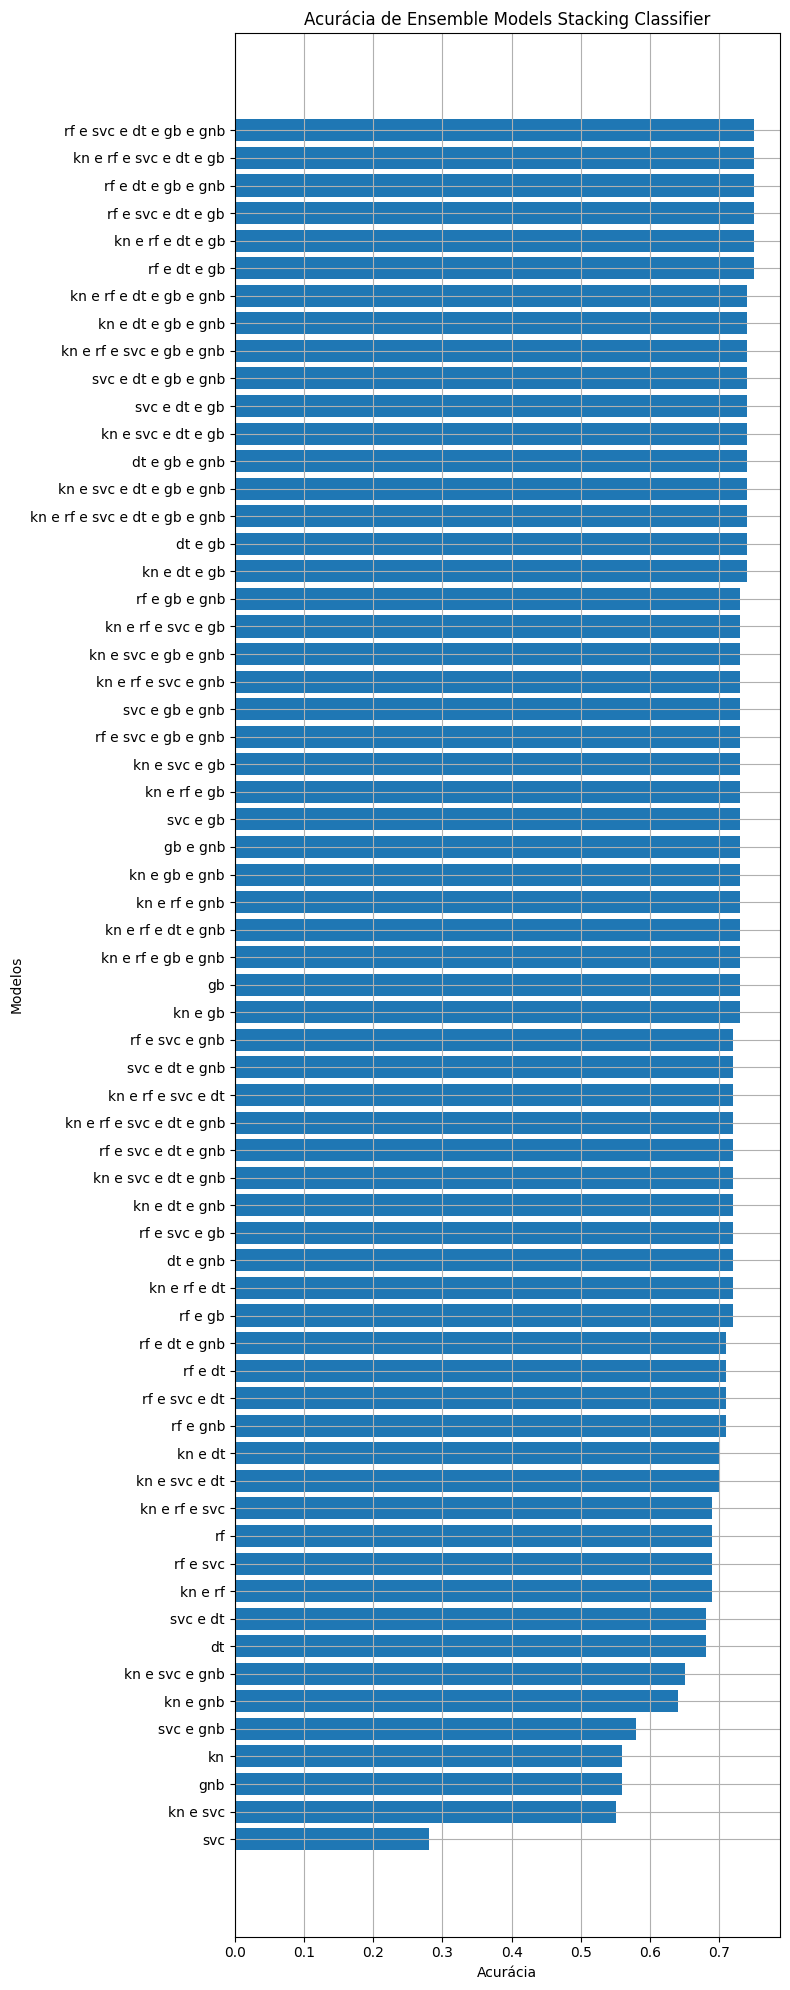

In [171]:
#Ordenar por acurácia
modelos_us_sc = np.array(modelos_us_sc)
modelos_sc_sc = np.array(modelos_sc_sc)
indices_ordenados_sc = np.argsort(modelos_sc_sc)
modelos_us_ord_sc = modelos_us_sc[indices_ordenados_sc]
modelos_sc_ord_sc = modelos_sc_sc[indices_ordenados_sc]

#Plotar
plt.figure(figsize=(8, 20))
plt.barh(modelos_us_ord_sc, modelos_sc_ord_sc)
plt.xlabel('Acurácia')
plt.ylabel('Modelos')
plt.title('Acurácia de Ensemble Models Stacking Classifier')
plt.tight_layout()
plt.grid(True)
plt.show()

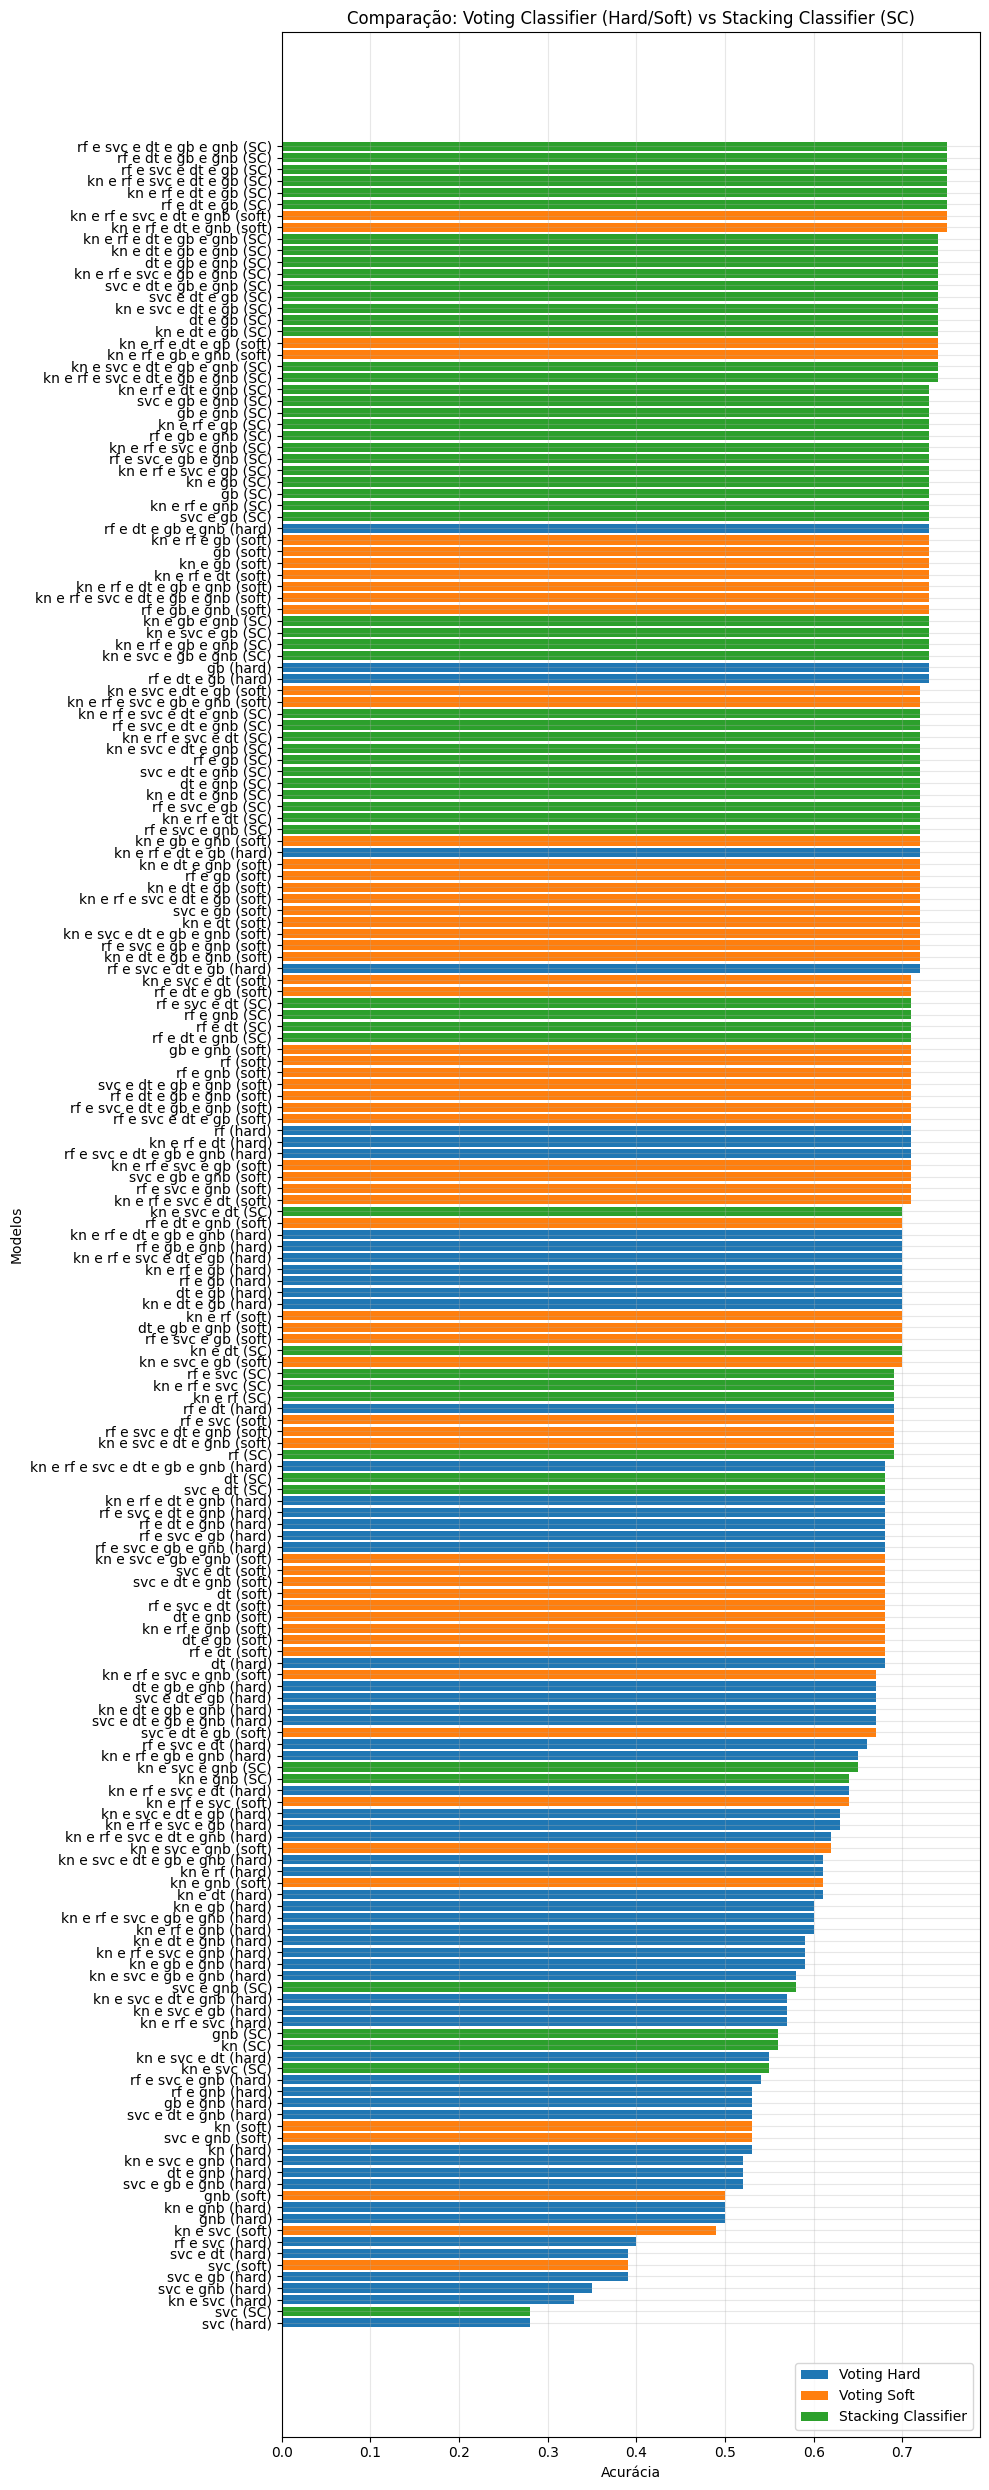

In [ ]:
# Juntar os arrays e adicionar sufixos
modelos_us_sc_n = [str(nome) + ' (SC)' for nome in modelos_us_sc]

# Concatenar os arrays
modelos_us_combinado = modelos_us_td.tolist() + modelos_us_sc_n
modelos_sc_combinado = np.concatenate([modelos_sc_td, modelos_sc_sc])

# Ordenar por acurácia
indices_ordenados = np.argsort(modelos_sc_combinado)
modelos_us_ord = np.array(modelos_us_combinado)[indices_ordenados]
modelos_sc_ord = modelos_sc_combinado[indices_ordenados]

plt.figure(figsize=(10, 25))
colors = []
for n in modelos_us_ord:
    if '(hard)' in n:
        colors.append('tab:blue')
    elif '(soft)' in n:
        colors.append('tab:orange')
    elif '(SC)' in n:
        colors.append('tab:green')
    else:
        colors.append('tab:red')

plt.barh(modelos_us_ord, modelos_sc_ord, color=colors)
plt.xlabel('Acurácia')
plt.ylabel('Modelos')
plt.title('Comparação: Voting Classifier (Hard/Soft) vs Stacking Classifier (SC)')
plt.tight_layout()
plt.grid(True, alpha=0.3)

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='tab:blue', label='Voting Hard'),
    Patch(facecolor='tab:orange', label='Voting Soft'),
    Patch(facecolor='tab:green', label='Stacking Classifier')
]
plt.legend(handles=legend_elements, loc='lower right')

plt.show()

In [176]:
from sklearn.linear_model import LogisticRegression
final_estimator = [("LR", LogisticRegression(random_state=42, 
                                      C=1.0, 
                                      max_iter=1000, 
                                      solver='saga')),
                    ("RF", RandomForestClassifier(random_state=27, 
                                          n_estimators=100, 
                                          max_depth=5,)),
                    ("GB", GradientBoostingClassifier(random_state=27, 
                                                n_estimators=100)),
                    ("SVC", SVC(probability=True, 
                        random_state=27, 
                        kernel='rbf'))
]
modelos_us_sc, modelos_sc_sc, final_used = [], [], []
for final_name, final_est in final_estimator:
    for k in modelos:
        stacking_classifier = StackingClassifier(
            estimators=k,
            final_estimator=final_est,
            cv=5
        )
        stacking_classifier.fit(train_x, train_y)
        y_pred = stacking_classifier.predict(test_x)
        accuracy_sc = accuracy_score(test_y, y_pred)
        
        modelos_sc_sc.append(accuracy_sc)
        strings = [name for name, _ in k]
        modelos_us_sc.append(' e '.join(strings))
        final_used.append(final_name)

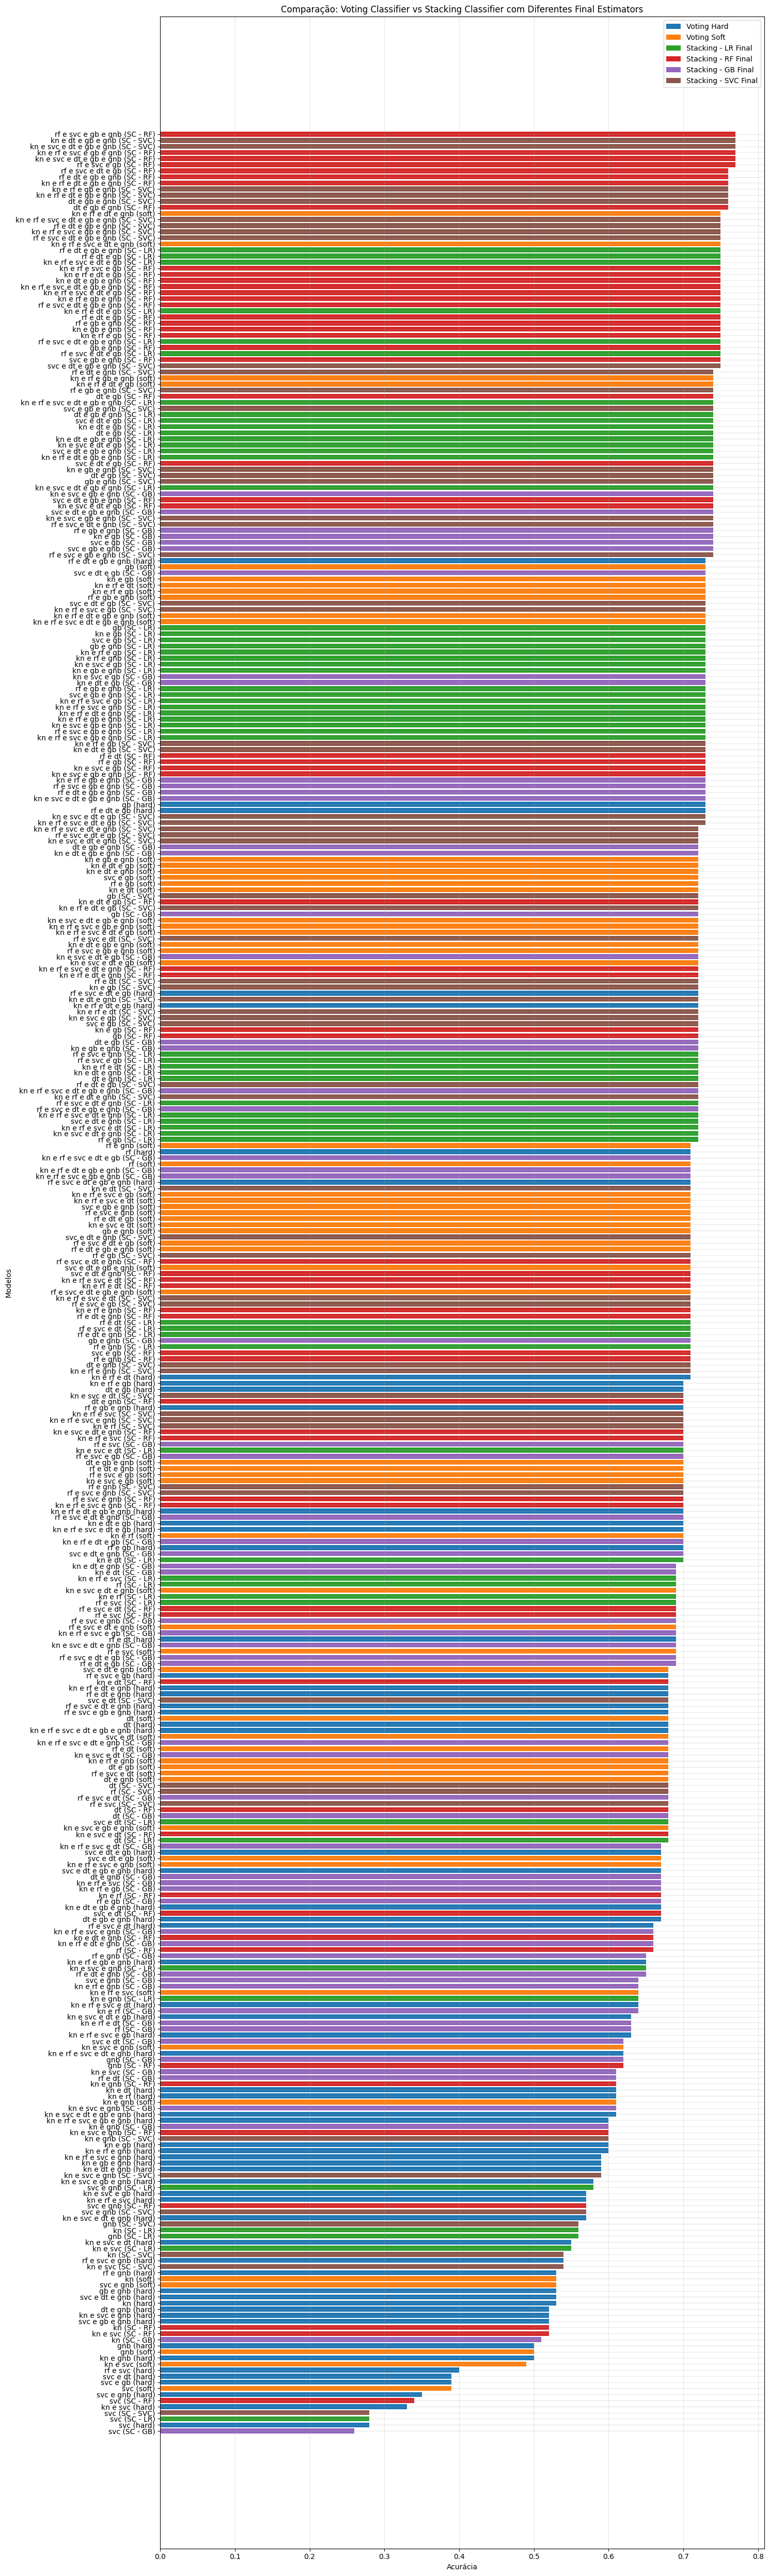

In [ ]:
modelos_us_sc_n = [f"{nome} (SC - {final})" for nome, final in zip(modelos_us_sc, final_used)]
modelos_us_combinado = modelos_us_td.tolist() + modelos_us_sc_n
modelos_sc_combinado = np.concatenate([modelos_sc_td, modelos_sc_sc])

indices_ordenados = np.argsort(modelos_sc_combinado)
modelos_us_ord = np.array(modelos_us_combinado)[indices_ordenados]
modelos_sc_ord = modelos_sc_combinado[indices_ordenados]

plt.figure(figsize=(15, 50))
colors = []
for n in modelos_us_ord:
    if '(hard)' in n:
        colors.append('tab:blue')
    elif '(soft)' in n:
        colors.append('tab:orange')
    elif '(SC - LR)' in n:
        colors.append('tab:green')
    elif '(SC - RF)' in n:
        colors.append('tab:red')
    elif '(SC - GB)' in n:
        colors.append('tab:purple')
    elif '(SC - SVC)' in n:
        colors.append('tab:brown')
    else:
        colors.append('tab:gray')

plt.barh(modelos_us_ord, modelos_sc_ord, color=colors)
plt.xlabel('Acurácia')
plt.ylabel('Modelos')
plt.title('Comparação: Voting Classifier vs Stacking Classifier com Diferentes Final Estimators')
plt.tight_layout()
plt.grid(True, alpha=0.3)
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='tab:blue', label='Voting Hard'),
    Patch(facecolor='tab:orange', label='Voting Soft'),
    Patch(facecolor='tab:green', label='Stacking - LR Final'),
    Patch(facecolor='tab:red', label='Stacking - RF Final'),
    Patch(facecolor='tab:purple', label='Stacking - GB Final'),
    Patch(facecolor='tab:brown', label='Stacking - SVC Final')
]
plt.legend(handles=legend_elements, loc='upper right')
plt.show()

Esse gráfico é muito interessante, revelando primeiramente que o modelo que se provou mais eficaz neste caso foi o StackingClassifier usando Random Forest, sendo 4 dos 6 únicos modelos que alcançaram 0.77 de acurácia. Além disso, os StackingClassifiers conseguiram neste dataframe ser predominantes nos melhores resultados em comparação com o VotingClassifier. Por outro lado, o tempo para o StackingClassifier foi quase três vezes maior, enquanto no VotingClassifier Soft conseguiu chegar bem próximo com acurácia de 0.75. Assim, é possível perceber um equilíbrio entre tempo gasto e acurácia. É interessante também como o pior modelo foi um StackingClassifier com SVC usando gradient boost.

### 5. Stacking of Voting
Por fim, podemos usar um ensemble como final estimator de um stacking. Isso já foi feito, ao usarmos a Random Forest, mas usaremos dessa vez um voting para um último teste de classificação.

In [188]:
voting_final = VotingClassifier(models)
SC = StackingClassifier(estimators=models, final_estimator=voting_final, cv=10)
SC.fit(train_x, train_y)
y_pred = SC.predict(test_x)
accuracy_sc = accuracy_score(test_y, y_pred)
accuracy_sc

C:\Users\matheus25022\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\matheus25022\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Program Files\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Program Files\Python312\Lib\subprocess.py", l

0.74

In [189]:
voting_final = VotingClassifier(models, voting='soft')
SC = StackingClassifier(estimators=models, final_estimator=voting_final, cv=10)
SC.fit(train_x, train_y)
y_pred = SC.predict(test_x)
accuracy_sc = accuracy_score(test_y, y_pred)
accuracy_sc

0.73

Conseguimos uma acuracia bem alta, de 0.74 (em comparação com o máximo até então de 0.77) com o voting hard e 0.73 com o voting soft. Foram resultados interessantes, estando no gráfico muito bem colocados. Isso mostra a grande potencialidade de combinações criativas usando ensembles.

### 6. Voting Regressor
Façamos agora algumas simulações simples com Voting Regressor.

Importemos a biblioteca e a tratemos

In [201]:
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
df_n = sns.load_dataset("Penguins")
df_n = df_n.dropna()
encoder = OneHotEncoder(sparse_output=False)
type_encoded = encoder.fit_transform(df_n[["sex"]])
df_n_type = pd.DataFrame(type_encoded, columns=encoder.get_feature_names_out(["sex"]), index=df_n.index)
df_n = pd.concat([df_n.drop(columns=["sex"]), df_n_type], axis=1)
encoder = OneHotEncoder(sparse_output=False)
type_encoded = encoder.fit_transform(df_n[["island"]])
df_n_type = pd.DataFrame(type_encoded, columns=encoder.get_feature_names_out(["island"]), index=df_n.index)
df_n = pd.concat([df_n.drop(columns=["island"]), df_n_type], axis=1)
type_encoded = encoder.fit_transform(df_n[["species"]])
df_n_type = pd.DataFrame(type_encoded, columns=encoder.get_feature_names_out(["species"]), index=df_n.index)
df_n = pd.concat([df_n.drop(columns=["species"]), df_n_type], axis=1)
df_n

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo
0,39.1,18.7,181.0,3750.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,39.5,17.4,186.0,3800.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,40.3,18.0,195.0,3250.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,36.7,19.3,193.0,3450.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,39.3,20.6,190.0,3650.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
340,46.8,14.3,215.0,4850.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
341,50.4,15.7,222.0,5750.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
342,45.2,14.8,212.0,5200.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [203]:
X = df_n.drop("body_mass_g", axis=1)
y = df_n["body_mass_g"]
SEMENTE = 27
#Divisão treino teste
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=SEMENTE)

Agora façamos o Voting Regressor

In [211]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


kn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state=27)
gb = GradientBoostingRegressor(random_state=27)

models=[('kn', kn), ('rf', rf), ("gb", gb)]

Façamos RMSE dos modelos individualmente:

In [212]:
from sklearn.metrics import root_mean_squared_error
kn.fit(train_x, train_y)
kn_pred = kn.predict(test_x)
print(f"O RMSE do KNN é {root_mean_squared_error(test_y, kn_pred)}")

rf.fit(train_x, train_y)
rf_pred = rf.predict(test_x)
print(f"O RMSE do Random Forest é {root_mean_squared_error(test_y, rf_pred)}")

gb.fit(train_x, train_y)
gb_pred = gb.predict(test_x)
print(f"O RMSE do Gradient Boost é {root_mean_squared_error(test_y, gb_pred)}")

O RMSE do KNN é 375.09606612643836
O RMSE do Random Forest é 338.8552962028274
O RMSE do Gradient Boost é 313.2638673065111


In [216]:
voting_reg = VotingRegressor(estimators=models) #Usando os 3
voting_reg.fit(train_x, train_y)
vr_pred = voting_reg.predict(test_x)
print(f"O RMSE do Voting Regressor do KNN, Gradient Boost e Random Forest é {root_mean_squared_error(test_y, vr_pred)}")

O RMSE do Voting Regressor do KNN, Gradient Boost e Random Forest é 330.68013507469306


In [217]:
voting_reg = VotingRegressor(estimators=models[1:]) #Usando GB e RF
voting_reg.fit(train_x, train_y)
vr_pred = voting_reg.predict(test_x)
print(f"O RMSE do Voting Regressor do Gradient Boost e Random Forest é {root_mean_squared_error(test_y, vr_pred)}")

O RMSE do Voting Regressor do Gradient Boost e Random Forest é 321.87760742385524


In [218]:
voting_reg = VotingRegressor(estimators=models[0:2]) #Usando KNN e RF
voting_reg.fit(train_x, train_y)
vr_pred = voting_reg.predict(test_x)
print(f"O RMSE do Voting Regressor do KNN e Random Forest é {root_mean_squared_error(test_y, vr_pred)}")

O RMSE do Voting Regressor do KNN e Random Forest é 346.14897124521065


Veja que o melhor modelo foi neste caso o Gradient Boost. Se juntarmos os dois melhores o resultado do RMSE esteve entre esses e o mesmo para os dois piores. Porém, percebemos que o resultado juntando todos os modelos foi satisfatoriamente bom.

### 7. Stacking Regressor
Façamos agora, por fim, o Stacking Regressor.

In [222]:
from sklearn.ensemble import StackingRegressor
sr = StackingRegressor(estimators=models, cv=5)
sr.fit(train_x, train_y)
sr_pred = sr.predict(test_x)
print(f"O RMSE do Stacking Regressor do KNN, Gradient Boost e Random Forest é {root_mean_squared_error(test_y, sr_pred)}")

O RMSE do Stacking Regressor do KNN, Gradient Boost e Random Forest é 324.01402557931266


Usando o final estimator Gradient Boost:

In [223]:
sr = StackingRegressor(estimators=models, final_estimator=gb, cv=5)
sr.fit(train_x, train_y)
sr_pred = sr.predict(test_x)
print(f"O RMSE do Stacking Regressor do KNN, Gradient Boost e Random Forest é {root_mean_squared_error(test_y, sr_pred)}")

O RMSE do Stacking Regressor do KNN, Gradient Boost e Random Forest é 316.39954067572086


Usando final estimator Random Forest

In [224]:
sr = StackingRegressor(estimators=models, final_estimator=rf, cv=5)
sr.fit(train_x, train_y)
sr_pred = sr.predict(test_x)
print(f"O RMSE do Stacking Regressor do KNN, Gradient Boost e Random Forest é {root_mean_squared_error(test_y, sr_pred)}")

O RMSE do Stacking Regressor do KNN, Gradient Boost e Random Forest é 313.3575410444302


In [228]:
sr = StackingRegressor(estimators=models[0:2], final_estimator=rf, cv=5)
sr.fit(train_x, train_y)
sr_pred = sr.predict(test_x)
print(f"O RMSE do Stacking Regressor do KNN e Random Forest é {root_mean_squared_error(test_y, sr_pred)}")

O RMSE do Stacking Regressor do KNN e Random Forest é 279.65443815432604


Veja que o Stacking Regressor conseguiu usando o final estimator, nos quatro casos um resultado melhor que o Voting Classifier, sendo um ótimo indício da eficiência desse modelo. Além disso, é interessante perceber que, nos modelos individuais, o Gradient Boost conseguiu uma acurácia melhor, porém, como final estimator, o Random Forest conseguiu resultados melhores. Além disso, usando knn e random forest com random forest de final estimator, conseguiu o melhor rmse dos testes, 279.65. Isso é interessante ao lembrar de como não existe um melhor modelo, só existe um melhor que outro para uma determinada situação.

### 8. Conclusão
Logo, os ensemble models se provaram métodos muito eficientes e poderosos, criando variações infinitas e abrindo possibilidades de explorar combinações de fraquezas e pontos fortes que se anulem para criar um modelo muito bom.

### Referências
SCIKIT-LEARN. VotingClassifier. 2025. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html. Acesso em: 6 out. 2025.

BIN SALIH, Ilyas. What is hard and soft voting in machine learning. 2025. Disponível em: https://ilyasbinsalih.medium.com/what-is-hard-and-soft-voting-in-machine-learning-2652676b6a32. Acesso em: 6 out. 2025.

DATA AND BEYOND. Voting classifier hard and soft in scikit-learn. 2025. Disponível em: https://medium.com/data-and-beyond/voting-classifier-hard-and-soft-in-scikit-learn-d2f3c091d973. Acesso em: 6 out. 2025.

F2ACODE. Comitê de classificadores: classificação multiclasse e multirrótulo. 2025. Disponível em: https://medium.com/@f2acode/comitê-de-classificadores-classificação-multiclasse-e-multirrótulo-7a01d87ee9b8. Acesso em: 6 out. 2025.

SALUNKE, Mangesh. Introduction to ensemble learning. 2025. Disponível em: https://medium.com/@mangeshsalunke1309/introduction-to-ensemble-learning-5641be2eeb26. Acesso em: 6 out. 2025.

ChatGPT. https://chatgpt.com/share/68e44d57-fe44-8011-95ee-97d2c4496a32. Acesso em: 6 out. 2025.

SCIKIT-LEARN. GradientBoostingClassifier (Version 0.15). 2014. Disponível em: https://scikit-learn.org/0.15/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html. Acesso em: 6 out. 2025.

SCIKIT-LEARN. Decision Trees. 2025. Disponível em: https://scikit-learn.org/stable/modules/tree.html. Acesso em: 6 out. 2025.

SCIKIT-LEARN. GaussianNB. 2025. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html. Acesso em: 6 out. 2025.

RUTECKI, Marcin. Stacking Classifier Ensemble for Great Results. 2025. Disponível em: https://www.kaggle.com/code/marcinrutecki/stacking-classifier-ensemble-for-great-results#5.1-Level-0-with-28-Models. Acesso em: 6 out. 2025.

SARAVANAN, Sharma. Understanding Stacking Classifiers: A Comprehensive Guide. 2025. Disponível em: https://sharmasaravanan.medium.com/understanding-stacking-classifiers-a-comprehensive-guide-195bfab58e48. Acesso em: 6 out. 2025.

SCIKIT-LEARN. StackingClassifier. 2025. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html. Acesso em: 6 out. 2025.

MLXTEND. StackingClassifier. 2025. Disponível em: https://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier. Acesso em: 6 out. 2025.

DATA AND BEYOND. Voting Regressor: Intuition and Implementation. 2025. Disponível em: https://medium.com/data-and-beyond/voting-regressor-intuition-and-implementation-0359771b5204. Acesso em: 6 out. 2025.

SCIKIT-LEARN. StackingRegressor. 2025. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html. Acesso em: 6 out. 2025.

SCIKIT-LEARN. VotingRegressor. 2025. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html. Acesso em: 6 out. 2025.

DeepSeek. https://chat.deepseek.com/share/q0kxwoy6syuav91w4e. Acesso em: 6 out. 2025.

R.Caliskan. Disamonds. 2025. Disponível em: https://www.kaggle.com/datasets/resulcaliskan/diamonds. Acesso em: 6 out. 2025.